In [21]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

import functions_optimal as fun

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42
area=4.0;linethicknes=1.0;


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fix parameters


In [22]:
idx_species=1;

g_E=8
g_I=3
'''beta=

log10_CVopto=np.log10(0.1)
log10_J=np.log10(0.0001)
'''
nRep=10;


# Build function param-> network response

In [23]:
param_min=[ 3.  ,  2. ,  -1. ,  -3.52, -1. ,  -5.  ]
param_max=[10.  ,  9.49,  1. ,  -0.52 , 1. ,  -2.3 ]
Predictor_sim,Predictor_data=fun.build_function()

# Create dataset

In [24]:
data_mice=np.loadtxt('Mice_with_trials.txt');
data_monkeys=np.loadtxt('Monkeys_with_trials.txt');
data_both_species=[data_mice,data_monkeys]

dataset,Con,nCon=fun.build_dataset(data_both_species[idx_species])


In [25]:
np.shape(dataset)

(6, 6, 2)

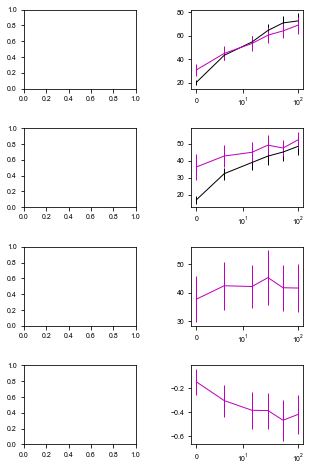

In [26]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()




for idx_moment in range(6):
    if idx_moment<2:
        idx_row=0
        ccc=['k',colors[idx_species]][idx_moment]

    if (idx_moment>=2)&(idx_moment<4):
        idx_row=1
        ccc=['k',colors[idx_species]][idx_moment-2]

    if (idx_moment==4):
        idx_row=2
        ccc=colors[idx_species]

    if (idx_moment==5):
        idx_row=3
        ccc=colors[idx_species]

    axs[2*idx_row+idx_species].errorbar(Con,dataset[idx_moment,:,0],dataset[idx_moment,:,1],
                                             color=ccc,)

    axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)




# Fit on dataset

In [27]:
sol,cost=fun.fit_model_to_data_fixed_gs(g_E,g_I,dataset,Predictor_data,nCon,nRep,param_min,param_max)

rep= 0  param init= [-0.16 -1.02  0.03 -4.4 ]
[-0.14 -2.02  0.14 -3.51] 8.525913986325545
rep= 1  param init= [-0.52 -1.02 -0.46 -3.27]
[-0.52 -1.02 -0.46 -3.27] 1.5097752405136621e+22
rep= 2  param init= [-0.95 -1.02  0.76 -4.88]
[-1.   -1.94  0.59 -4.16] 21.82257946696007
rep= 3  param init= [-0.47 -1.02  0.31 -3.48]
[-0.14 -1.95  0.13 -3.52] 8.802663262188553
rep= 4  param init= [-0.02 -1.02 -0.92 -3.96]
[-0.13 -1.94  0.13 -3.52] 8.79480454588727
rep= 5  param init= [-0.56 -1.02  0.52 -4.  ]
[-0.14 -2.02  0.14 -3.51] 8.525652818608618
rep= 6  param init= [-0.5  -1.02 -0.67 -3.52]
[-0.13 -1.94  0.13 -3.52] 8.793750281597323
rep= 7  param init= [-0.3  -1.02 -0.18 -3.8 ]
[-0.14 -2.02  0.14 -3.51] 8.526238847274698
rep= 8  param init= [-0.48 -1.02  0.4  -4.96]
[-0.59 -0.68  0.83 -4.87] 68.87289982690035
rep= 9  param init= [-0.56 -1.02  0.86 -4.2 ]
[-1.   -1.94  0.58 -4.16] 21.839329200149265


In [28]:
idx_best=np.argmin(cost)
best_param=sol[idx_best,:]
best_cost=cost[idx_best]
best_param=np.concatenate(([g_E,g_I],best_param))
best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

print(best_param,best_inputs,best_cost)

[ 8.    3.   -0.14 -2.02  0.14 -3.51] [1.17 1.47 1.56 1.62 1.65 1.68 0.93] 8.525652818608618


Monkeys 8.525652818608618
array([ 8.  ,  3.  , -0.14, -2.02,  0.14, -3.51])
array([1.17, 1.47, 1.56, 1.62, 1.65, 1.68, 0.93])


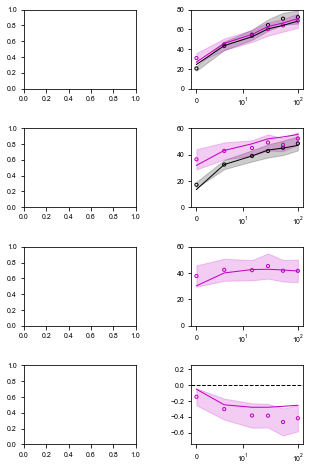

In [29]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()




Predictions=Predictor_data(best_inputs,best_param,nCon)
print(['Mice','Monkeys'][idx_species],best_cost)
print(repr(best_param))
print(repr(best_inputs))        
for idx_moment in range(6):
    if idx_moment<2:
        idx_row=0
        ccc=['k',colors[idx_species]][idx_moment]
        ymin=0
        ymax=[25,80][idx_species]

    if (idx_moment>=2)&(idx_moment<4):
        idx_row=1
        ccc=['k',colors[idx_species]][idx_moment-2]
        ymin=0
        ymax=[20,60][idx_species]

    if (idx_moment==4):
        idx_row=2
        ccc=colors[idx_species]
        ymin=0
        ymax=[20,60][idx_species]

    if (idx_moment==5):
        idx_row=3
        ccc=colors[idx_species]
        ymin=-0.75
        ymax=0.25

    m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
    axs[2*idx_row+idx_species].scatter(Con,m,
                                       facecolors='none', s=10,edgecolors=ccc,marker='o'
                                       )
    axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                             color=ccc,alpha=0.2)

    axs[2*idx_row+idx_species].plot(Con,Predictions[idx_moment,:],
                                    color=ccc,alpha=1.)

    axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
    axs[2*idx_row+idx_species].set_ylim([ymin,ymax])
axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')

In [30]:
results=np.zeros((1,len(best_param)
                  +len(best_inputs)
                 +1))

results[0,0:len(best_param)]=best_param[:]
results[0,len(best_param):(len(best_param)+len(best_inputs))]=best_inputs[:]
results[0,(len(best_param)+len(best_inputs))]=best_cost


In [31]:
results

array([[ 8.  ,  3.  , -0.14, -2.02,  0.14, -3.51,  1.17,  1.47,  1.56,
         1.62,  1.65,  1.68,  0.93,  8.53]])